# Linear Regression on Income and House Price

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
#find out which feature is most related with price
df.corr()['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

In [56]:
#Deploy a Linear Regress from income and price
X = df['Avg. Area Income'].values
y = df['Price'].values

In [57]:
#find out A,B for linear Regression
numerator=0
denominator=0

for i in range(len(X)):
    numerator += (X[i]-X.mean())*(y[i]-y.mean())
    denominator += (X[i]-X.mean())**2

B = numerator / denominator
A = y.mean() - B*X.mean()

In [67]:
#Predict
X_new = [max(X),min(X)]
y_pred = B*np.array(X_new) + A
y_pred

array([2061211.11711996,  155628.71868912])

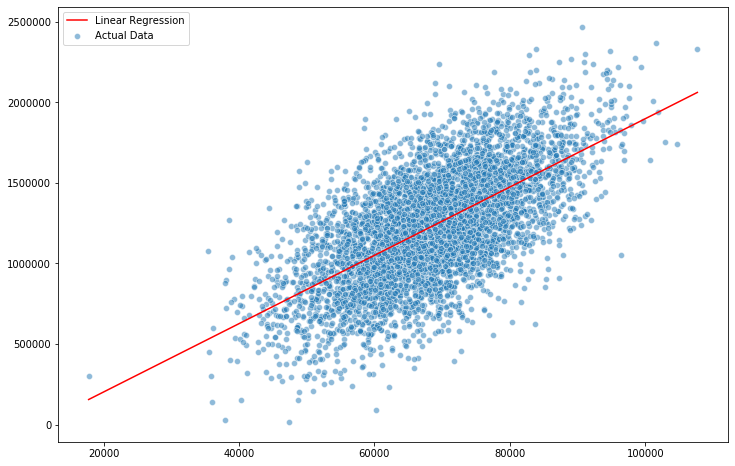

In [63]:
#Plot
plt.figure(figsize=(12,8))
sns.scatterplot(X,y,alpha=.5, palette="muted",label='Actual Data')
sns.lineplot(X_new, y_pred,color = 'r',label='Linear Regression')

In [78]:
#Calculate R squares 
y_pred = B*X + A
SSR = sum(pow(y_pred-y.mean(),2))
SST = sum(pow(y-y.mean(),2))
SSR/SST

0.40925930703388563